In [79]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib_scalebar.scalebar import ScaleBar

In [62]:
boundaries = gpd.read_file('../data/processed_data/city_boundary/Delft.gpkg').to_crs('EPSG:28992')

In [16]:
spatial_units = gpd.read_file('../data/processed_data/zones_delineation/PC_Delft.gpkg')
spatial_units = spatial_units.drop(columns = ['Postcode','gemeente','area_ratio'])

In [19]:
exposure = pd.read_csv('../data/results/exposure/Delft_exposure.csv', usecols= ['id_unit','expos_NW'])

In [22]:
spatial_units = spatial_units.merge(exposure, on = 'id_unit')
average_expos = spatial_units['expos_NW'].mean()
std_expos = spatial_units['expos_NW'].std()

In [29]:
regions = gpd.read_file('../data/results/regions/regions.gpkg')

In [31]:
regions_city = regions.loc[(regions['seg'] == 1) & (regions['city'] == 'Delft')]

In [40]:
spatial_units['test'] = 0
spatial_units['test'] = spatial_units['test'].mask(,(spatial_units['expos_NW']-average_expos)/std_expos)

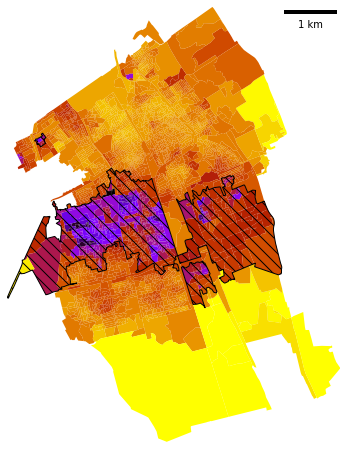

In [80]:
fig, ax = plt.subplots(1, figsize=(8, 8))
#fig.set_tight_layout(True)
ax.margins(0)
spatial_units.plot(ax=ax, column = 'test', cmap = 'gnuplot_r') #cax to put the legend on a specific axis.
regions_city.plot(ax=ax,color = 'none',hatch='\\\\')
#boundaries.plot(ax=ax,color = 'none', edgecolor = 'black')
#df_zones.plot(ax=ax, color  = 'none', edgecolor='black')
ax.axis('off')
ax.add_artist(ScaleBar(1))
plt.show()
fig.savefig('../report/figures/all_cities/Delft.png')

In [ ]:
spatial_units.plot(a)

In [12]:
exposure

,id_unit,access_NL,access_WE,access_NW,access_tot,expos_NW,expos_NL,expos_WE,pop_res,N_NW_res,N_NL_res,N_WE_res,P_NW_res,P_NL_res,P_WE_res,share_NL_c,share_WE_c,share_NW_c,city
0,2289EM0,99.040439,18.643286,9.936638,127.620362,0.077861,0.776055,0.146084,22.0,0.0,14.0,8.0,0.000000,0.636364,0.363636,0.699604,0.116089,0.184307,Delft
1,2289EX0,26.437106,3.645993,3.732664,33.815763,0.110382,0.781798,0.107819,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.699604,0.116089,0.184307,Delft
2,2611AG0,396.568591,103.251923,82.066614,581.887128,0.141035,0.681522,0.177443,33.0,8.0,25.0,0.0,0.242424,0.757576,0.000000,0.699604,0.116089,0.184307,Delft
3,2611AK0,499.597666,106.519652,58.247361,664.364678,0.087674,0.751993,0.160333,25.0,5.0,10.0,10.0,0.200000,0.400000,0.400000,0.699604,0.116089,0.184307,Delft
4,2611AL0,309.394417,82.529951,35.726574,427.650942,0.083541,0.723474,0.192984,30.0,0.0,22.0,8.0,0.000000,0.733333,0.266667,0.699604,0.116089,0.184307,Delft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3051,2636EE0,70.380210,0.089898,0.000000,70.470107,0.000000,0.998724,0.001276,70.0,0.0,70.0,0.0,0.000000,1.000000,0.000000,0.699604,0.116089,0.184307,Delft
3052,2636KA0,43.122430,0.000000,0.000000,43.122430,0.000000,1.000000,0.000000,43.0,0.0,43.0,0.0,0.000000,1.000000,0.000000,0.699604,0.116089,0.184307,Delft
3053,2645BP0,109.644329,7.424939,0.458725,117.527993,0.003903,0.932921,0.063176,112.0,0.0,105.0,7.0,0.000000,0.937500,0.062500,0.699604,0.116089,0.184307,Delft
3054,2645GA0,135.192866,9.791681,5.562504,150.547050,0.036949,0.898011,0.065041,93.0,0.0,87.0,6.0,0.000000,0.935484,0.064516,0.699604,0.116089,0.184307,Delft
